In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lag
spark = SparkSession.builder.appName("ITC dataset").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_itc = spark.read.format("csv").option("header","True").option("inferSchema","True").load("/content/drive/MyDrive/ITC-DatasetEDA /ITC.csv")

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/content/drive/MyDrive/ITC-DatasetEDA /ITC.csv.

In [ ]:
df_itc.show()

In [ ]:
cleaned_df = df_itc.dropna()

In [ ]:
print(df_itc.columns)

In [ ]:
df_cleaned  = df_itc.filter((col("Price").isNotNull()) & (col("Adj Close").isNotNull()) & (col("Close").isNotNull()) & (col("High").isNotNull())& (col("Low").isNotNull())& (col("Open").isNotNull())& (col("Volume").isNotNull()))

In [ ]:
df_cleaned.show()

In [ ]:
df_cleaned = spark.createDataFrame(df_cleaned.tail(df_cleaned.count() - 1), schema=df_cleaned.schema)

In [ ]:
df_cleaned.show()

In [ ]:
df_cleaned = df_cleaned.withColumnRenamed("Price", "Date")

In [ ]:
df_cleaned.show()

In [ ]:
df_cleaned = df_cleaned.withColumnRenamed("Adj Close", "Adj_Close")

In [ ]:
df_cleaned.show()

In [ ]:
df_cleaned.printSchema()

In [ ]:
df_cleaned.count()

In [ ]:
df_cleaned.show(7250)

In [ ]:
df_cleaned.coalesce(1).write.format("csv").option("header", "true").mode("overwrite").save("/content/drive/MyDrive/ITC-DatasetEDA ")

In [ ]:
itc = spark.read.format("csv").option("header","True").option("inferSchema","True").load("/content/drive/MyDrive/ITC-DatasetEDA /ITC-cleaneddata.csv")

In [ ]:
itc.registerTempTable("ITC_Stock")

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
itc.show()

+-------------------+-----------+-----------+-----------+-----------+-----------+--------+
|               Date|  Adj_Close|      Close|       High|        Low|       Open|  Volume|
+-------------------+-----------+-----------+-----------+-----------+-----------+--------+
|1996-01-01 00:00:00|3.141414165|5.583333015|5.599999905|5.533332825|5.550000191|  985500|
|1996-01-02 00:00:00|3.022634268|5.372221947|5.566666126|5.288887978|5.466666222| 7470000|
|1996-01-03 00:00:00|2.925735474|5.199999809|5.254444122|5.101110935|5.133333206|15160500|
|1996-01-04 00:00:00|2.980748415|5.297777176|5.332221985|5.144443989|5.199999809|12397500|
|1996-01-05 00:00:00|2.926985741| 5.20222187|5.277777195|5.188888073|5.297777176| 5008500|
|1996-01-08 00:00:00|2.836962938|5.042222023|5.238887787|5.011110783| 5.20222187|12645000|
|1996-01-09 00:00:00|2.829461336|5.028888226|5.108888149|4.983333111|5.042222023| 8968500|
|1996-01-10 00:00:00|2.820082903|5.012221813|5.111111164|4.977777004|5.028888226| 2988000|

In [ ]:
from pyspark.sql.functions import year, month

In [ ]:
#2. Day with Highest Adj_Close Price:

df_adjClose = spark.sql("SELECT Date, Adj_Close FROM ITC_Stock ORDER BY Adj_Close DESC LIMIT 1;").show()

+-------------------+---------+
|               Date|Adj_Close|
+-------------------+---------+
|2024-09-26 00:00:00|   522.75|
+-------------------+---------+



In [ ]:
#3. Day with Lowest Adj_Close Price:
df_lowAdj = spark.sql("SELECT Date, Adj_Close FROM ITC_Stock ORDER BY Adj_Close ASC LIMIT 1;").show()


+-------------------+----------+
|               Date| Adj_Close|
+-------------------+----------+
|1996-01-25 00:00:00|2.35309124|
+-------------------+----------+



In [ ]:
#4. Average Daily Trading Volume:
df_daily = spark.sql("SELECT AVG(Volume) AS Avg_Daily_Volume FROM ITC_Stock;").show()


+-------------------+
|   Avg_Daily_Volume|
+-------------------+
|4.246153672455172E7|
+-------------------+



In [ ]:
#5. Day with Highest Volume:
df_day = spark.sql("SELECT Date, Volume, Adj_Close FROM ITC_Stock ORDER BY Volume DESC LIMIT 1;").show()


+-------------------+----------+-----------+
|               Date|    Volume|  Adj_Close|
+-------------------+----------+-----------+
|1997-11-21 00:00:00|1294168500|6.839415073|
+-------------------+----------+-----------+



In [ ]:
#6. Trends in Monthly/Yearly Average Volume:
df_month = spark.sql("SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, AVG(Volume) AS Avg_Volume FROM ITC_Stock GROUP BY YEAR(Date), MONTH(Date) ORDER BY Year, Month;").show()

+----+-----+--------------------+
|Year|Month|          Avg_Volume|
+----+-----+--------------------+
|1996|    1|  7513826.0869565215|
|1996|    2| 1.093157142857143E7|
|1996|    3|1.4744785714285715E7|
|1996|    4| 2.813809090909091E7|
|1996|    5| 2.411413043478261E7|
|1996|    6|        1.45797975E8|
|1996|    7|1.9613602173913044E8|
|1996|    8|1.6143586363636363E8|
|1996|    9|1.3442785714285713E8|
|1996|   10| 2.283296086956522E8|
|1996|   11|           3.44253E8|
|1996|   12|2.1778527272727272E8|
|1997|    1|3.9326380434782606E8|
|1997|    2|         3.7747395E8|
|1997|    3|2.9785821428571427E8|
|1997|    4| 2.393220681818182E8|
|1997|    5|3.2235954545454544E8|
|1997|    6| 3.969730714285714E8|
|1997|    7| 3.128779565217391E8|
|1997|    8|4.1041328571428573E8|
+----+-----+--------------------+
only showing top 20 rows



In [ ]:
#7. Correlation Between Volume and Daily Adj_Close Change:
df_vol=spark.sql("WITH DailyChanges AS (SELECT Date, Volume, Adj_Close, LAG(Adj_Close) OVER (ORDER BY Date) AS Prev_Adj_Close FROM ITC_Stock) SELECT CORR(Volume, Adj_Close - Prev_Adj_Close) AS Volume_AdjClose_Correlation FROM DailyChanges;").show()

+---------------------------+
|Volume_AdjClose_Correlation|
+---------------------------+
|       0.002751487869635...|
+---------------------------+



In [ ]:
#8. Days with Adj_Close > Open:
df_open = spark.sql("SELECT COUNT(*) AS Days_AdjClose_Higher FROM ITC_Stock WHERE Adj_Close > Open;").show()

+--------------------+
|Days_AdjClose_Higher|
+--------------------+
|                  58|
+--------------------+



In [ ]:
#9. Days with Adj_Close < Open:
df_close = spark.sql("SELECT COUNT(*) AS Days_AdjClose_Lower FROM ITC_Stock WHERE Adj_Close < Open;").show()


+-------------------+
|Days_AdjClose_Lower|
+-------------------+
|               7192|
+-------------------+



In [ ]:
#10. Average Daily Volatility:
df_volt = spark.sql("SELECT AVG(High - Low) AS Avg_Daily_Volatility FROM ITC_Stock;").show()


+--------------------+
|Avg_Daily_Volatility|
+--------------------+
|   3.105110788138352|
+--------------------+



In [ ]:
#11. Day with Highest Volatility:

df_highVolt = spark.sql("SELECT Date, High, Low, (High - Low) AS Volatility FROM ITC_Stock ORDER BY Volatility DESC LIMIT 1;").show()

+-------------------+-----------+-----------+-----------------+
|               Date|       High|        Low|       Volatility|
+-------------------+-----------+-----------+-----------------+
|2012-10-05 00:00:00|186.6666718|146.8333282|39.83334359999998|
+-------------------+-----------+-----------+-----------------+



In [ ]:
#12. Average Monthly Returns:
df_monthly = spark.sql("SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, (MAX(Adj_Close) - MIN(Adj_Close)) / MIN(Adj_Close) * 100 AS Monthly_Return FROM ITC_Stock GROUP BY YEAR(Date), MONTH(Date) ORDER BY Monthly_Return desc;").show()

+----+-----+------------------+
|Year|Month|    Monthly_Return|
+----+-----+------------------+
|2000|    4| 55.17910025717856|
|2000|    2|48.109249465810436|
|2000|    5| 42.04865152599704|
|1996|    2|34.784608987135464|
|1996|    1| 33.50158768174243|
|2020|    3|32.631573569600455|
|2009|    7| 32.59615974353106|
|2000|    1| 32.16558795651203|
|2004|    5|29.700832581035314|
|2001|    9| 29.61620036195436|
|2008|   10|29.127532748151086|
|1997|    1| 28.51129379264175|
|2000|    3| 27.19331722678332|
|1996|   12|26.846942375168776|
|1999|    9| 26.60675140618937|
|2006|    5|26.602166610176127|
|2008|    1| 26.46251454690485|
|1999|   10|25.291835183932488|
|1996|    3|25.277598611824427|
|2006|    6|24.717927477997982|
+----+-----+------------------+
only showing top 20 rows



In [ ]:
#13. Performance by Month/Quarter:
df_quat = spark.sql("SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, QUARTER(Date) AS Quarter, AVG(Adj_Close) AS Avg_Adj_Close, AVG(High - Low) AS Avg_Volatility FROM ITC_Stock GROUP BY YEAR(Date), MONTH(Date), QUARTER(Date) ORDER BY Year, Month;").show()


+----+-----+-------+------------------+-------------------+
|Year|Month|Quarter|     Avg_Adj_Close|     Avg_Volatility|
+----+-----+-------+------------------+-------------------+
|1996|    1|      1|2.7391936261739125| 0.1687923306521739|
|1996|    2|      1| 3.344977299380952|  0.305978684190476|
|1996|    3|      1|2.9963182041428573|0.20074081419047612|
|1996|    4|      2| 3.217342485045454| 0.1892424061818182|
|1996|    5|      2|3.4160213573913043| 0.1844928782608696|
|1996|    6|      2|3.7877954363499997| 0.2584445715500001|
|1996|    7|      3| 3.859507716217392| 0.2187440499130435|
|1996|    8|      3|3.7318711064090917|0.16676757568181813|
|1996|    9|      3| 3.715207951333333|0.16492055695238095|
|1996|   10|      4|3.9383666720869566| 0.2304830965217391|
|1996|   11|      4|3.4290230955238092|0.25894180938095235|
|1996|   12|      4|3.6868910355909077|0.22606065045454543|
|1997|    1|      1| 4.706972371000001|0.38352649095652147|
|1997|    2|      1|     5.08217551715|0

In [ ]:
#14. Average Adj_Close Price Per Year:
df_adjClose = spark.sql("SELECT YEAR(Date) AS Year, AVG(Adj_Close) AS Avg_Adj_Close FROM ITC_Stock GROUP BY YEAR(Date) ORDER BY Year;").show()


+----+------------------+
|Year|     Avg_Adj_Close|
+----+------------------+
|1996|3.4880432199732847|
|1997| 6.201684644869734|
|1998|  8.62553457279694|
|1999|11.486956183490417|
|2000| 9.768292276753852|
|2001| 9.838816909249044|
|2002| 8.799704242946367|
|2003|10.168513008276921|
|2004| 14.72762936057694|
|2005|22.973844253559996|
|2006| 37.95078381838057|
|2007| 36.90316942411292|
|2008|42.631150501422745|
|2009| 48.23910404732512|
|2010| 68.92586451735994|
|2011| 88.71289515329273|
|2012|117.71167811081635|
|2013| 154.4456720032258|
|2014|170.12515690081975|
|2015|166.68887614512212|
+----+------------------+
only showing top 20 rows



In [ ]:
#15. Stock Behavior During Pandemic (2020–2021):
df_pand = spark.sql("SELECT YEAR(Date) AS Year, MONTH(Date) AS Month, AVG(Adj_Close) AS Avg_Adj_Close, AVG(High - Low) AS Avg_Volatility, AVG(Volume) AS Avg_Volume FROM ITC_Stock WHERE YEAR(Date) BETWEEN 2020 AND 2021 GROUP BY YEAR(Date), MONTH(Date) ORDER BY Year, Month;").show()



+----+-----+------------------+------------------+--------------------+
|Year|Month|     Avg_Adj_Close|    Avg_Volatility|          Avg_Volume|
+----+-----+------------------+------------------+--------------------+
|2020|    1| 192.6460571304348| 3.156520004347826|   9550196.260869564|
|2020|    2|168.25275863157893|5.2289444578947375| 2.180856436842105E7|
|2020|    3| 135.2408338333333|11.469045714285715|4.2166007952380955E7|
|2020|    4|146.88966624999998| 6.888888888888889|         2.9760753E7|
|2020|    5|141.08060335263158| 7.492103973684211| 2.917873552631579E7|
|2020|    6|156.73866133181818| 6.845452731818182| 3.473656995454545E7|
|2020|    7|166.90449524347827|4.4739120956521745|2.6269464260869566E7|
|2020|    8|167.64336286190482|3.9714275476190477| 2.703056438095238E7|
|2020|    9|153.69697154090906| 4.306819563636364|2.9377036681818184E7|
|2020|   10|143.19917951904765| 3.242856714285714| 2.512248019047619E7|
|2020|   11|      156.61487121| 4.694998934999999|       3.31564

In [ ]:
#16. Volume and Volatility During Major Events:
df_volatility = spark.sql("SELECT Date, Adj_Close, Volume, (High - Low) AS Volatility FROM ITC_Stock WHERE YEAR(Date) BETWEEN 2020 AND 2021 ORDER BY Date;").show()


+-------------------+-----------+--------+------------------+
|               Date|  Adj_Close|  Volume|        Volatility|
+-------------------+-----------+--------+------------------+
|2020-01-01 00:00:00|193.0037842| 4208837|               1.5|
|2020-01-02 00:00:00|194.4223328| 8402979|2.8499908000000005|
|2020-01-03 00:00:00|193.3280029| 9284478|               3.0|
|2020-01-06 00:00:00|190.5720062| 7636617| 3.300003099999998|
|2020-01-07 00:00:00|190.7746277| 8416741|3.2999877999999967|
|2020-01-08 00:00:00|189.8424377| 7043211| 2.550003099999998|
|2020-01-09 00:00:00| 191.139389| 9452653|1.5500030000000038|
|2020-01-10 00:00:00|192.9227295| 9973746|1.9499969000000021|
|2020-01-13 00:00:00|193.9359589|12243639|              2.25|
|2020-01-14 00:00:00|  197.17836|11843444|               5.5|
|2020-01-15 00:00:00|196.4893646| 5476729|1.8999938999999983|
|2020-01-16 00:00:00| 195.151886| 9369668|3.7999877999999967|
|2020-01-17 00:00:00|194.5033875| 7392403|2.7000122000000033|
|2020-01

In [ ]:
#17. Standard Deviation of Daily Adj_Close Prices:
df_std = spark.sql("SELECT STDDEV(Adj_Close) AS StdDev_Adj_Close FROM ITC_Stock;").show()


+------------------+
|  StdDev_Adj_Close|
+------------------+
|117.27159975602581|
+------------------+



In [ ]:
#18. Average Percentage Change Between Open and Adj_Close:
df_perc = spark.sql("SELECT AVG((Adj_Close - Open) / Open * 100) AS Avg_Percentage_Change FROM ITC_Stock;").show()

+---------------------+
|Avg_Percentage_Change|
+---------------------+
|   -29.47463859112812|
+---------------------+



In [ ]:
#19. Bullish vs Bearish Days:
df_bull = spark.sql("SELECT COUNT(CASE WHEN Adj_Close > Open THEN 1 END) AS Bullish_Days, COUNT(CASE WHEN Adj_Close < Open THEN 1 END) AS Bearish_Days FROM ITC_Stock;").show()

+------------+------------+
|Bullish_Days|Bearish_Days|
+------------+------------+
|          58|        7192|
+------------+------------+



In [ ]:
#20. Best Months or Quarters for Investment:

df_Months = spark.sql("SELECT MONTH(Date) AS Month, QUARTER(Date) AS Quarter, AVG(Adj_Close) AS Avg_Adj_Close FROM ITC_Stock GROUP BY MONTH(Date), QUARTER(Date) ORDER BY Avg_Adj_Close DESC;").show()


+-----+-------+------------------+
|Month|Quarter|     Avg_Adj_Close|
+-----+-------+------------------+
|    9|      3|120.58312734177451|
|    8|      3|119.01913210335175|
|   10|      4|118.66345699008856|
|    7|      3|118.55595508047725|
|    6|      2|112.88445443947731|
|   11|      4|112.31418439727292|
|    5|      2|111.74245358861958|
|   12|      4|107.08156924062128|
|    4|      2|106.24760405898773|
|    2|      1|106.06663894061214|
|    1|      1| 105.7519202990985|
|    3|      1|102.93219456147605|
+-----+-------+------------------+



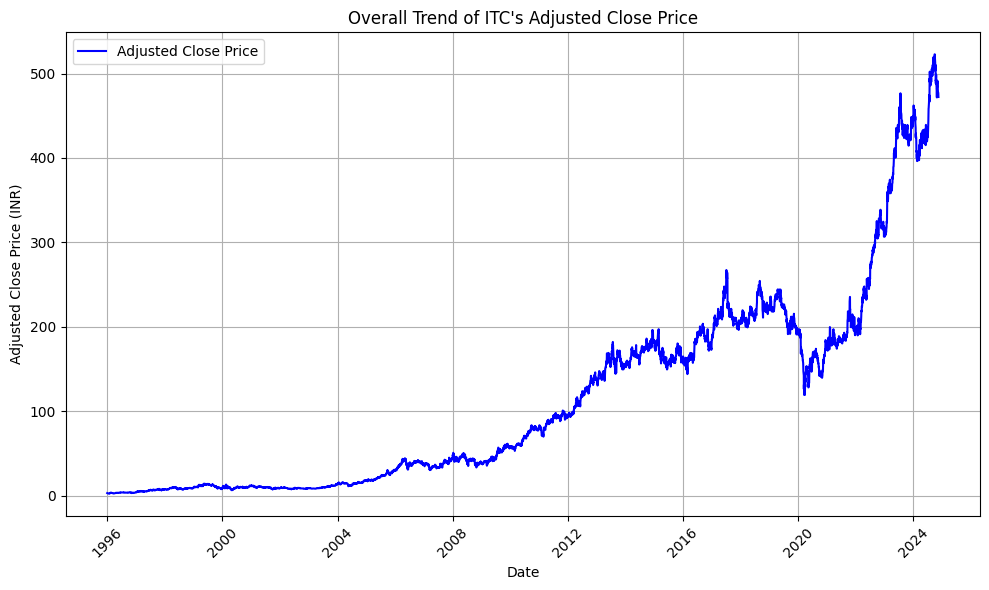

<ipython-input-26-f7e68d5c4d20>:24: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year-Month'] = df['Date'].dt.to_period('M')


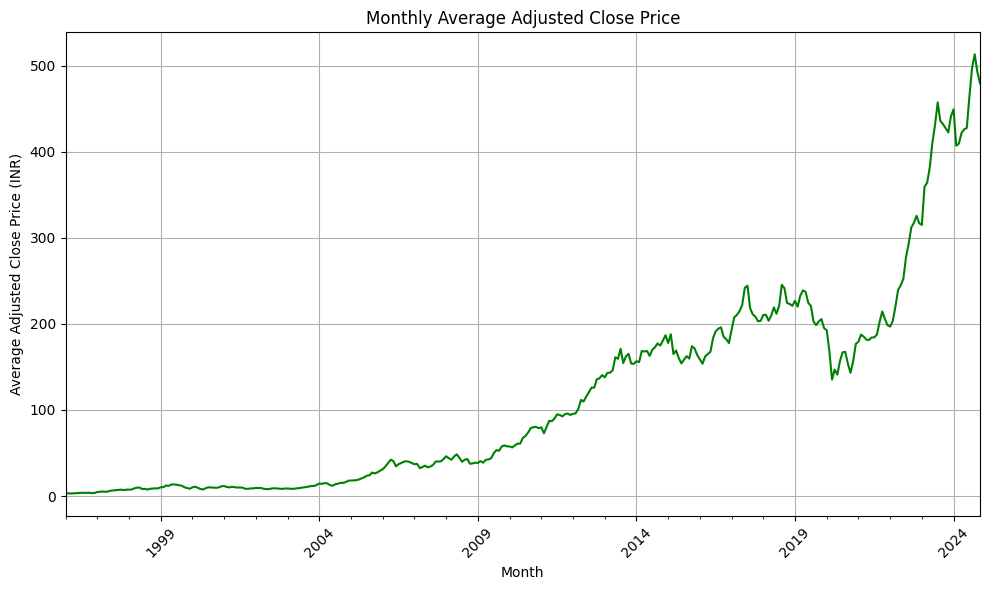

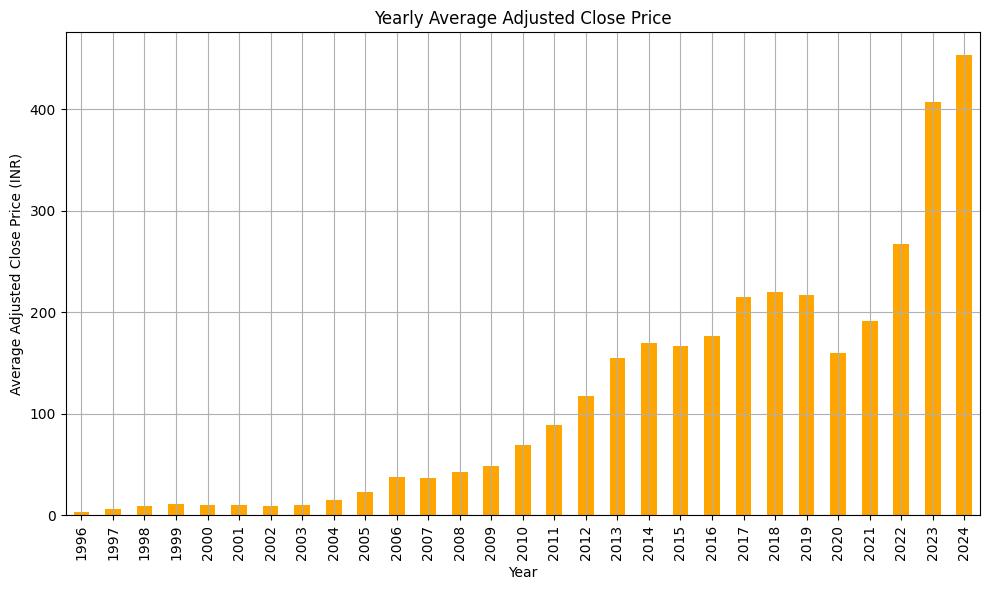

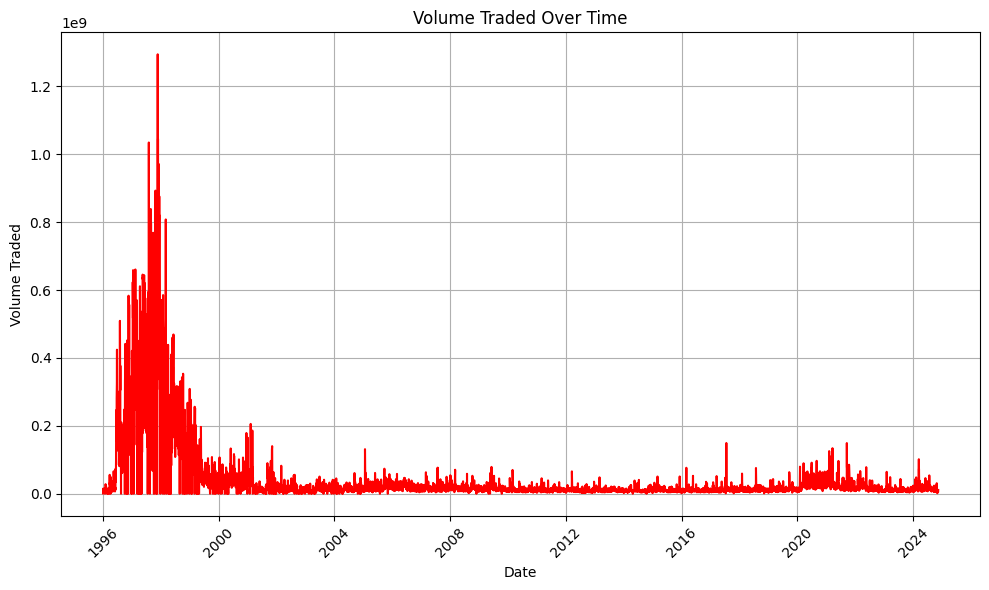

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = '/content/drive/MyDrive/ITC-DatasetEDA /ITC-cleaneddata.csv'
df = pd.read_csv(file_path)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the overall trend of Adjusted Close prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Adj_Close'], label='Adjusted Close Price', color='blue')
plt.title('Overall Trend of ITC\'s Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (INR)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the monthly average of Adjusted Close Price
df['Year-Month'] = df['Date'].dt.to_period('M')
monthly_avg = df.groupby('Year-Month')['Adj_Close'].mean()

plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', color='green')
plt.title('Monthly Average Adjusted Close Price')
plt.xlabel('Month')
plt.ylabel('Average Adjusted Close Price (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the yearly average of Adjusted Close Price
df['Year'] = df['Date'].dt.year
yearly_avg = df.groupby('Year')['Adj_Close'].mean()

plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='orange')
plt.title('Yearly Average Adjusted Close Price')
plt.xlabel('Year')
plt.ylabel('Average Adjusted Close Price (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the volume over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volume'], label='Volume', color='red')
plt.title('Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_loss = spark.sql("SELECT   Date , Close , Open , High , Low , Adj_close FROM ITC_STOCK WHERE YEAR(Date) BETWEEN 2008 AND 2009;").show()

+-------------------+-----------+-----------+-----------+-----------+-----------+
|               Date|      Close|       Open|       High|        Low|  Adj_close|
+-------------------+-----------+-----------+-----------+-----------+-----------+
|2008-01-01 00:00:00|72.53333282|70.66666412| 73.6166687|70.03333282|47.81211853|
|2008-01-02 00:00:00|73.69999695|73.30000305|75.80000305|71.43333435|48.58115005|
|2008-01-03 00:00:00|71.48332977|73.33333588|73.66666412|70.68333435|47.11998367|
|2008-01-04 00:00:00| 73.1166687|71.66666412|73.40000153|71.05000305|48.19663239|
|2008-01-07 00:00:00|77.09999847|70.56666565|78.33333588|70.56666565|50.82233047|
|2008-01-08 00:00:00|       77.0|77.93333435|79.80000305|74.69999695|50.75643921|
|2008-01-09 00:00:00| 76.0166626|       76.5|78.15000153| 75.3666687|50.10823822|
|2008-01-10 00:00:00| 73.2666626|76.33333588|76.66666412|72.71666718|48.29551315|
|2008-01-11 00:00:00|73.48332977|73.33333588|75.09999847|71.46666718|48.43832397|
|2008-01-14 00:0

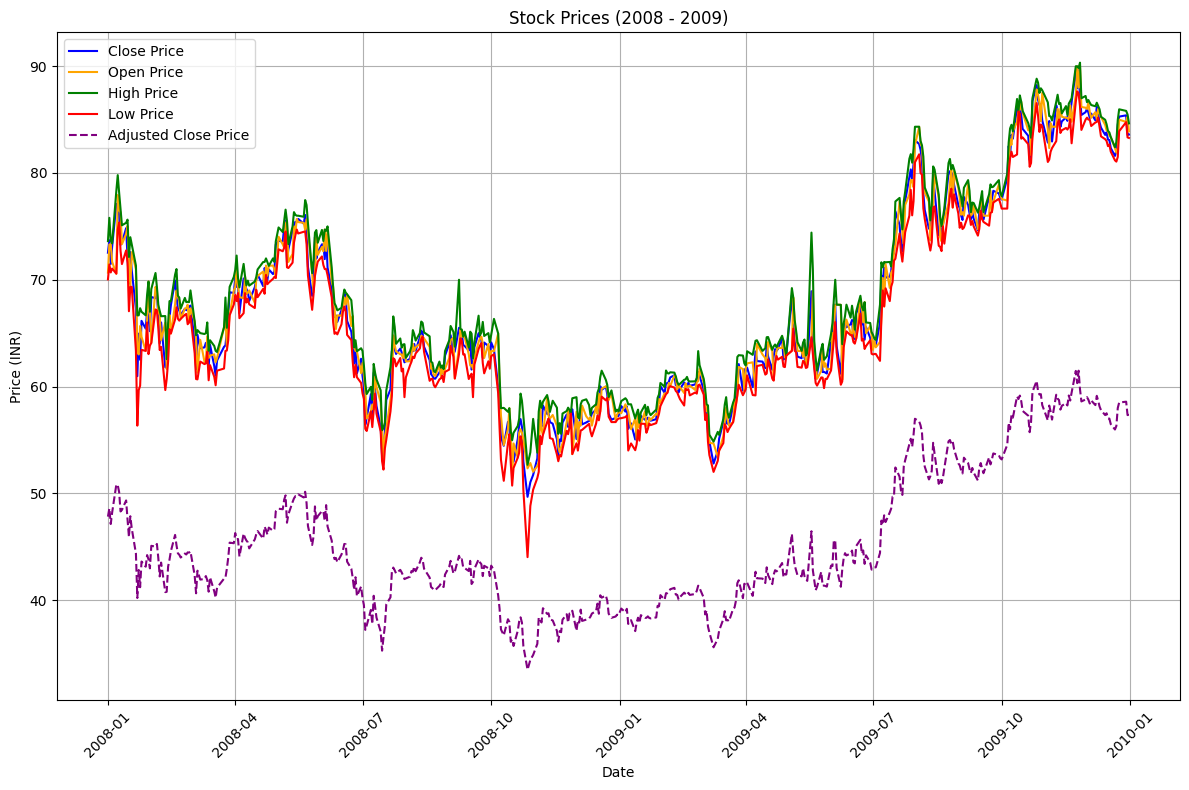

In [ ]:
# Reimport necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Reload the data
file_path = '/content/drive/MyDrive/ITC-DatasetEDA /ITC-cleaneddata.csv'
df = pd.read_csv(file_path)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for the years 2008 to 2009
filtered_df = df[(df['Date'].dt.year >= 2008) & (df['Date'].dt.year <= 2009)]

# Plotting Open, Close, High, Low, and Adjusted Close prices
plt.figure(figsize=(12, 8))

# Plot Close prices
plt.plot(filtered_df['Date'], filtered_df['Close'], label='Close Price', color='blue')

# Plot Open prices
plt.plot(filtered_df['Date'], filtered_df['Open'], label='Open Price', color='orange')

# Plot High prices
plt.plot(filtered_df['Date'], filtered_df['High'], label='High Price', color='green')

# Plot Low prices
plt.plot(filtered_df['Date'], filtered_df['Low'], label='Low Price', color='red')

# Plot Adjusted Close prices
plt.plot(filtered_df['Date'], filtered_df['Adj_Close'], label='Adjusted Close Price', color='purple', linestyle='--')

# Add titles and labels
plt.title('Stock Prices (2008 - 2009)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
